In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline, BSpline, spline
from sklearn.isotonic import IsotonicRegression

In [22]:
def plot_acc(dataframe):
    order = 1
    data = np.array(dataframe)
    lr_list = []
    reg_list = []
    acc_list = []
    for i in range(len(data)):
        if i % 2 == 0:
            ind_lr = data[i][0].find('\'lr\': ')
            len_lr = len('\'lr\': ')
            ind_reg = data[i][0].find(', \'reg\': ')
            len_reg = len(', \'reg\': ')
            ind_arrow = data[i][0].find('}-->')
            lr_list = np.append(lr_list, (float(data[i][0][len_lr + ind_lr : ind_reg])))
            reg_list = np.append(reg_list, (float(data[i][0][len_reg + ind_reg : ind_arrow])))
            ind_acc = data[i][0].find('\'val_acc\': [')
            len_acc = len('\'val_acc\': [')
            ind_fin = data[i][0].find(']}')
            acc = data[i][0][len_acc + ind_acc : ind_fin].split(",")
            acc_list = np.append(acc_list, np.mean([float(acc[0]), float(acc[1]), float(acc[2])]))

    X = np.array([(i + 1) for i in range(40)])

    Xsmooth_lr = np.linspace(X.min(),X.max(),300)
    ysmooth_lr = spline(X,lr_list,Xsmooth_lr, order=order)
    #spl = make_interp_spline(X, acc_list, k=3)
    #acc_smooth = spl(Xnew)
    
    ysmooth_reg = spline(X,reg_list,Xsmooth_lr)
    
    ysmooth_performance = spline(X,acc_list,Xsmooth_lr, order=order)

    #ir = IsotonicRegression()
    #y_ = ir.fit_transform(Xnew, acc_smooth)

    return Xsmooth_lr, ysmooth_lr, ysmooth_reg, ysmooth_performance
    #return X, lr_list, reg_list, acc_list

In [47]:
X_momentum_vgg8, y_lr_momentum_vgg8, y_reg_momentum_vgg8, y_performance_momentum_vgg8 = plot_acc(pd.read_table('./momentum_vgg8/log.txt'))

X_nesterov_vgg8, y_lr_nesterov_vgg8, y_reg_nesterov_vgg8, y_performance_nesterov_vgg8 = plot_acc(pd.read_table('./nesterov_vgg8/log.txt'))

X_rmsprop_vgg8, y_lr_rmsprop_vgg8, y_reg_rmsprop_vgg8, y_performance_rmsprop_vgg8 = plot_acc(pd.read_table('./rmsprop_vgg8/log.txt'))

X_adam_vgg8, y_lr_adam_vgg8, y_reg_adam_vgg8, y_performance_adam_vgg8 = plot_acc(pd.read_table('./adam_vgg8/log.txt'))
#X_momentum_vgg8, y_momentum_vgg8 = plot_acc(pd.read_table('./momentum_vgg8/log.txt'), 'b-')
width=4
#plt.yscale('symlog', linthreshy=0.01)
#plt.plot(X_momentum_vgg8, y_momentum_vgg8, 'b--', markersize=12)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:29: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:31: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.


In [51]:
X_momentum_vgg11, y_lr_momentum_vgg11, y_reg_momentum_vgg11, y_performance_momentum_vgg11 = plot_acc(pd.read_table('./momentum_vgg11/log.txt'))

X_nesterov_vgg11, y_lr_nesterov_vgg11, y_reg_nesterov_vgg11, y_performance_nesterov_vgg11 = plot_acc(pd.read_table('./nesterov_vgg11/log.txt'))

X_rmsprop_vgg11, y_lr_rmsprop_vgg11, y_reg_rmsprop_vgg11, y_performance_rmsprop_vgg11 = plot_acc(pd.read_table('./rmsprop_vgg11/log.txt'))

X_adam_vgg11, y_lr_adam_vgg11, y_reg_adam_vgg11, y_performance_adam_vgg11 = plot_acc(pd.read_table('./adam_vgg11/log.txt'))
#X_momentum_vgg8, y_momentum_vgg8 = plot_acc(pd.read_table('./momentum_vgg8/log.txt'), 'b-')
width=4

#plt.yscale('symlog', linthreshy=0.01)
#plt.plot(X_momentum_vgg8, y_momentum_vgg8, 'b--', markersize=12)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:29: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:31: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.


In [56]:
print("lr_momentum_vgg8=",max(y_lr_momentum_vgg8))
#print("index=",np.where(y_lr_momentum_vgg8==max(y_lr_momentum_vgg8)))
print("lr_nesterov_vgg8=",max(y_lr_nesterov_vgg8))
#print("index=",np.where(y_lr_nesterov_vgg8==max(y_lr_nesterov_vgg8)))
print("lr_rmsprop_vgg8=",max(y_lr_rmsprop_vgg8))
#print("index=",np.where(y_lr_rmsprop_vgg8==max(y_lr_rmsprop_vgg8)))
print("lr_adam_vgg8=",max(y_lr_adam_vgg8))
#print("index=",np.where(y_lr_adam_vgg8==max(y_lr_adam_vgg8)))

lr_momentum_vgg8= 0.07798568310658081
lr_nesterov_vgg8= 0.08524254823805284
lr_rmsprop_vgg8= 0.0016327303362849226
lr_adam_vgg8= 0.006763195652492548


In [41]:
print("reg_momentum_vgg8=",y_reg_momentum_vgg8[168])
print("reg_nesterov_vgg8=",y_reg_nesterov_vgg8[131])
print("reg_rmsprop_vgg8=",y_reg_rmsprop_vgg8[76])
print("reg_adam_vgg8=",y_reg_adam_vgg8[100])

reg_momentum_vgg8= 9.094118090176206e-06
reg_nesterov_vgg8= 8.2809094587408e-06
reg_rmsprop_vgg8= 1.0476786417199025e-05
reg_adam_vgg8= 1.3613406229981152e-05


In [57]:
print("lr_momentum_vgg11=",max(y_lr_momentum_vgg11))
#print("index=",np.where(y_lr_momentum_vgg11==max(y_lr_momentum_vgg11)))
print("lr_nesterov_vgg11=",max(y_lr_nesterov_vgg11))
#print("index=",np.where(y_lr_nesterov_vgg11==max(y_lr_nesterov_vgg11)))
print("lr_rmsprop_vgg11=",max(y_lr_rmsprop_vgg11))
#print("index=",np.where(y_lr_rmsprop_vgg11==max(y_lr_rmsprop_vgg11)))
print("lr_adam_vgg11=",max(y_lr_adam_vgg11))
#print("index=",np.where(y_lr_adam_vgg11==max(y_lr_adam_vgg11)))

lr_momentum_vgg11= 0.07523536351995472
lr_nesterov_vgg11= 0.06744177944235515
lr_rmsprop_vgg11= 0.0008661781521822687
lr_adam_vgg11= 0.002934958714348201


In [44]:
print("reg_momentum_vgg11=",y_reg_momentum_vgg11[191])
print("reg_nesterov_vgg11=",y_reg_nesterov_vgg11[169])
print("reg_rmsprop_vgg11=",y_reg_rmsprop_vgg11[92])
print("reg_adam_vgg11=",y_reg_adam_vgg11[84])

reg_momentum_vgg11= 9.068251800516717e-06
reg_nesterov_vgg11= 1.1725202471528672e-05
reg_rmsprop_vgg11= 1.0765002161225501e-05
reg_adam_vgg11= 1.0158969255913503e-05


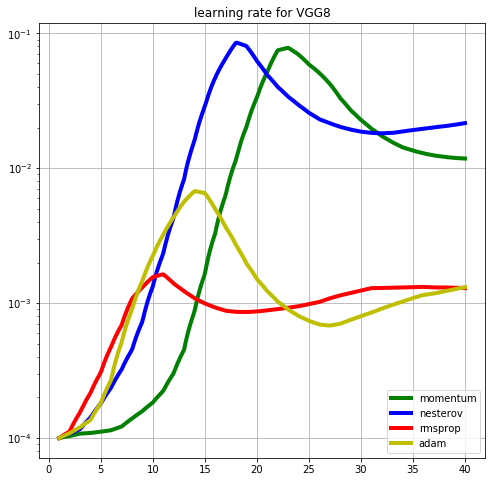

In [106]:
plt.figure(figsize = (8, 8))
plt.plot(X_momentum_vgg8, y_lr_momentum_vgg8, 'g-',linewidth=width, label='momentum')
plt.plot(X_nesterov_vgg8, y_lr_nesterov_vgg8, 'b-',linewidth=width, label='nesterov')
plt.plot(X_rmsprop_vgg8, y_lr_rmsprop_vgg8, 'r-',linewidth=width, label='rmsprop')
plt.plot(X_adam_vgg8, y_lr_adam_vgg8, 'y-',linewidth=width, label='adam')
plt.yscale('log')
plt.title('learning rate for VGG8')
plt.grid(True)
plt.legend(loc='lower right')
plt.savefig("./image/learning rate for VGG8.png")

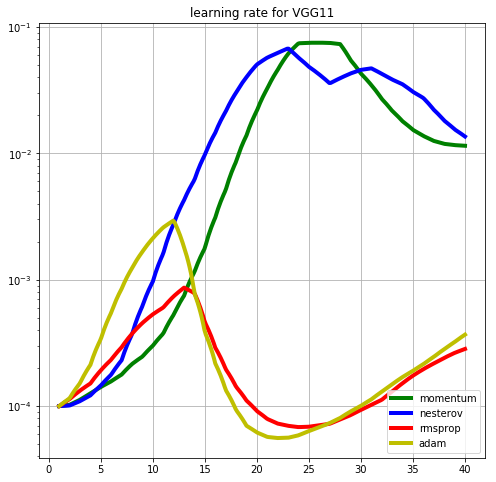

In [107]:
plt.figure(figsize = (8, 8))
plt.plot(X_momentum_vgg11, y_lr_momentum_vgg11, 'g-',linewidth=width, label='momentum')
plt.plot(X_nesterov_vgg11, y_lr_nesterov_vgg11, 'b-',linewidth=width, label='nesterov')
plt.plot(X_rmsprop_vgg11, y_lr_rmsprop_vgg11, 'r-',linewidth=width, label='rmsprop')
plt.plot(X_adam_vgg11, y_lr_adam_vgg11, 'y-',linewidth=width, label='adam')
plt.yscale('log')
plt.title('learning rate for VGG11')
plt.grid(True)
plt.legend(loc='lower right')
plt.savefig("./image/learning rate for VGG11.png")

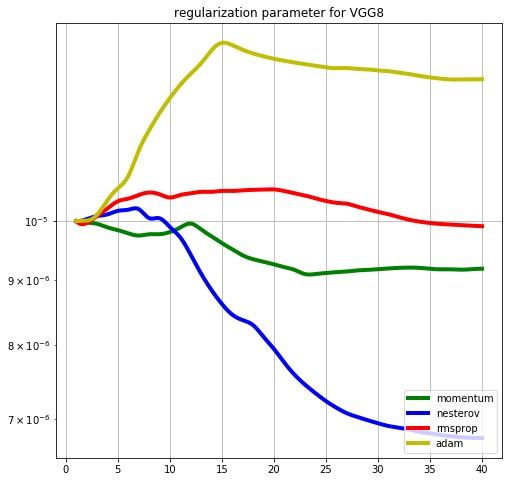

In [108]:
plt.figure(figsize = (8, 8))
#plt.plot(X_momentum_vgg11, y_reg, 'g-.', markersize=12)
plt.plot(X_momentum_vgg8, y_reg_momentum_vgg8, 'g-',linewidth=width, label='momentum')
plt.plot(X_nesterov_vgg8, y_reg_nesterov_vgg8, 'b-',linewidth=width, label='nesterov')
plt.plot(X_rmsprop_vgg8, y_reg_rmsprop_vgg8, 'r-',linewidth=width, label='rmsprop')
plt.plot(X_adam_vgg8, y_reg_adam_vgg8, 'y-',linewidth=width, label='adam')
plt.yscale('log')
plt.title('regularization parameter for VGG8')
plt.grid(True)
plt.legend(loc='lower right')
plt.savefig("./image/regularization parameter for VGG8.png")

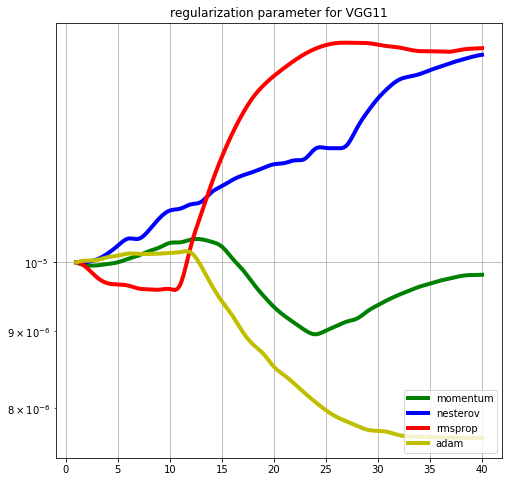

In [109]:
plt.figure(figsize = (8, 8))
#plt.plot(X_momentum_vgg11, y_reg, 'g-.', markersize=12)
plt.plot(X_momentum_vgg11, y_reg_momentum_vgg11, 'g-',linewidth=width, label='momentum')
plt.plot(X_nesterov_vgg11, y_reg_nesterov_vgg11, 'b-',linewidth=width, label='nesterov')
plt.plot(X_rmsprop_vgg11, y_reg_rmsprop_vgg11, 'r-',linewidth=width, label='rmsprop')
plt.plot(X_adam_vgg11, y_reg_adam_vgg11, 'y-',linewidth=width, label='adam')
plt.yscale('log')
plt.title('regularization parameter for VGG11')
plt.grid(True)
plt.legend(loc='lower right')
plt.savefig("./image/regularization parameter for VGG11.png")

In [59]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

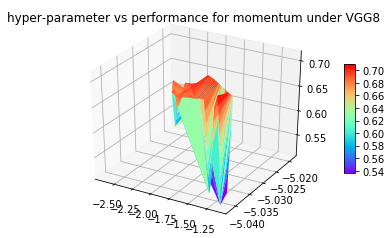

In [118]:
fig = plt.figure()
ax = fig.gca(projection='3d')
y_lr_log = np.log10(y_lr_momentum_vgg8)
y_reg_log = np.log10(y_reg_momentum_vgg8)
y_performance = y_performance_momentum_vgg8
indice = (y_performance > 0.5)
surf = ax.plot_trisurf(y_lr_log[indice], y_reg_log[indice], y_performance[indice],cmap=plt.cm.rainbow)
#ax.contourf(y_lr_log[indice], y_reg_log[indice], y_performance[indice])
fig.colorbar(surf, shrink=0.5, aspect=10)
plt.title('hyper-parameter vs performance for momentum under VGG8')
plt.savefig("./image/hyper-parameter vs performance for momentum under VGG8.png")
plt.show()


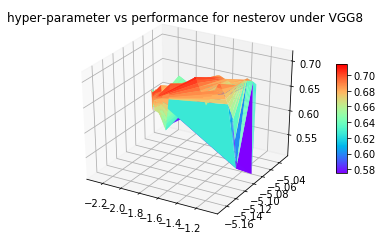

In [119]:
fig = plt.figure()
ax = fig.gca(projection='3d')
y_lr_log = np.log10(y_lr_nesterov_vgg8)
y_reg_log = np.log10(y_reg_nesterov_vgg8)
y_performance = y_performance_nesterov_vgg8
indice = (y_performance > 0.5)
surf = ax.plot_trisurf(y_lr_log[indice], y_reg_log[indice], y_performance[indice],cmap=plt.cm.rainbow)
#ax.contourf(y_lr_log[indice], y_reg_log[indice], y_performance[indice])
fig.colorbar(surf, shrink=0.5, aspect=10)
plt.title('hyper-parameter vs performance for nesterov under VGG8')
plt.savefig("./image/hyper-parameter vs performance for nesterov under VGG8.png")
plt.show()

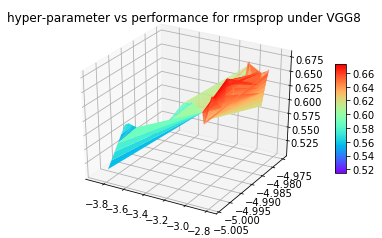

In [120]:
fig = plt.figure()
ax = fig.gca(projection='3d')
y_lr_log = np.log10(y_lr_rmsprop_vgg8)
y_reg_log = np.log10(y_reg_rmsprop_vgg8)
y_performance = y_performance_rmsprop_vgg8
indice = (y_performance > 0.5)
surf = ax.plot_trisurf(y_lr_log[indice], y_reg_log[indice], y_performance[indice],cmap=plt.cm.rainbow)
#ax.contourf(y_lr_log[indice], y_reg_log[indice], y_performance[indice])
fig.colorbar(surf, shrink=0.5, aspect=10)
plt.title('hyper-parameter vs performance for rmsprop under VGG8')
plt.savefig("./image/hyper-parameter vs performance for rmsprop under VGG8.png")
plt.show()

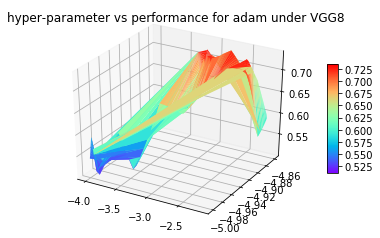

<Figure size 432x288 with 0 Axes>

In [113]:
fig = plt.figure()
ax = fig.gca(projection='3d')
y_lr_log = np.log10(y_lr_adam_vgg8)
y_reg_log = np.log10(y_reg_adam_vgg8)
y_performance = y_performance_adam_vgg8
indice = (y_performance > 0.5)
surf = ax.plot_trisurf(y_lr_log[indice], y_reg_log[indice], y_performance[indice],cmap=plt.cm.rainbow)
#ax.contourf(y_lr_log[indice], y_reg_log[indice], y_performance[indice])
fig.colorbar(surf, shrink=0.5, aspect=10)
plt.title('hyper-parameter vs performance for adam under VGG8')
plt.savefig("./image/hyper-parameter vs performance for adam under VGG8.png")

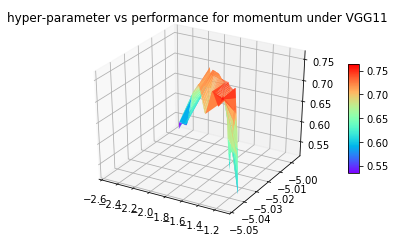

<Figure size 432x288 with 0 Axes>

In [114]:
fig = plt.figure()
ax = fig.gca(projection='3d')
y_lr_log = np.log10(y_lr_momentum_vgg11)
y_reg_log = np.log10(y_reg_momentum_vgg11)
y_performance = y_performance_momentum_vgg11
indice = (y_performance > 0.5)
surf = ax.plot_trisurf(y_lr_log[indice], y_reg_log[indice], y_performance[indice],cmap=plt.cm.rainbow)
#ax.contourf(y_lr_log[indice], y_reg_log[indice], y_performance[indice])
fig.colorbar(surf, shrink=0.5, aspect=10)
plt.title('hyper-parameter vs performance for momentum under VGG11')
plt.show()
plt.savefig("./image/hyper-parameter vs performance for momentum under VGG11.png")

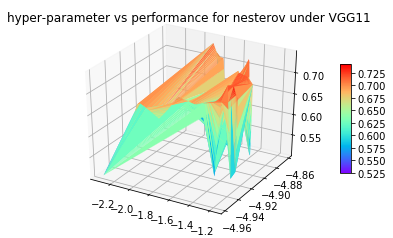

<Figure size 432x288 with 0 Axes>

In [115]:
fig = plt.figure()
ax = fig.gca(projection='3d')
y_lr_log = np.log10(y_lr_nesterov_vgg11)
y_reg_log = np.log10(y_reg_nesterov_vgg11)
y_performance = y_performance_nesterov_vgg11
indice = (y_performance > 0.5)
surf = ax.plot_trisurf(y_lr_log[indice], y_reg_log[indice], y_performance[indice],cmap=plt.cm.rainbow)
#ax.contourf(y_lr_log[indice], y_reg_log[indice], y_performance[indice])
fig.colorbar(surf, shrink=0.5, aspect=10)
plt.title('hyper-parameter vs performance for nesterov under VGG11')
plt.show()
plt.savefig("./image/hyper-parameter vs performance for nesterov under VGG11.png")

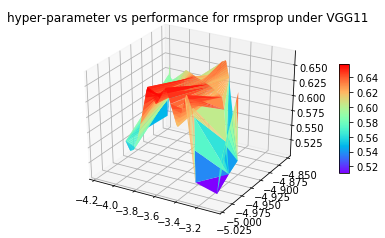

<Figure size 432x288 with 0 Axes>

In [116]:
fig = plt.figure()
ax = fig.gca(projection='3d')
y_lr_log = np.log10(y_lr_rmsprop_vgg11)
y_reg_log = np.log10(y_reg_rmsprop_vgg11)
y_performance = y_performance_rmsprop_vgg11
indice = (y_performance > 0.5)
surf = ax.plot_trisurf(y_lr_log[indice], y_reg_log[indice], y_performance[indice],cmap=plt.cm.rainbow)
#ax.contourf(y_lr_log[indice], y_reg_log[indice], y_performance[indice])
fig.colorbar(surf, shrink=0.5, aspect=10)
plt.title('hyper-parameter vs performance for rmsprop under VGG11')
plt.show()
plt.savefig("./image/hyper-parameter vs performance for rmsprop under VGG11.png")

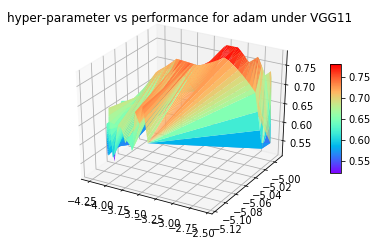

<Figure size 432x288 with 0 Axes>

In [117]:
fig = plt.figure()
ax = fig.gca(projection='3d')
#ax.view_init(elev=90, azim=45)
y_lr_log = np.log10(y_lr_adam_vgg11)
y_reg_log = np.log10(y_reg_adam_vgg11)
y_performance = y_performance_adam_vgg11
indice = (y_performance > 0.5)
surf = ax.plot_trisurf(y_lr_log[indice], y_reg_log[indice], y_performance[indice],cmap=plt.cm.rainbow)
fig.colorbar(surf, shrink=0.5, aspect=10)
plt.title('hyper-parameter vs performance for adam under VGG11')
plt.show()
plt.savefig("./image/hyper-parameter vs performance for adam under VGG11.png")
